# SD202 TP3 - Views, Updates and Database Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a marketplace


For the first 2 parts we will use the _wine_ database and the Tables created in TP2.

A reminder of the wine database schema:

In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
ACHATS:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
BUVEUR:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(NUM)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
PRODUCER:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
RECOLTE:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
REGION:
  0: LIEU(TEXT)
  1: REGION(TEXT)
WINE:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
WINE2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


Again, we recommend inline %sql as an alternative to the sqlite3 package

In [4]:
%load_ext sql
%sql sqlite:///wine.db

Recreate the Tables in 3NF/BCNF from Master2 as you did in the TP2

In [52]:
# Write corresponding code here
%sql DROP TABLE IF EXISTS WINE2;
%sql DROP TABLE IF EXISTS BUVEUR;
%sql DROP TABLE IF EXISTS ACHATS;
%sql DROP TABLE IF EXISTS REGION;

%sql CREATE TABLE WINE2 AS \
SELECT DISTINCT NV, CRU, DEGRE, MILL\
FROM MASTER2 WHERE NV != 'None';

%sql CREATE TABLE BUVEUR AS \
SELECT DISTINCT NB, NOM, PRENOM, TYPE\
FROM MASTER2 WHERE NB != 'None';

%sql CREATE TABLE ACHATS AS \
SELECT DISTINCT NV, NB, DATES, LIEU, QTE\
FROM MASTER2 WHERE NV != 'None';

%sql CREATE Table REGION AS\
SELECT LIEU, REGION\
FROM MASTER2 WHERE REGION != 'None'
print("\nContent of the database")
printSchema(conn)

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.

Content of the database
ACHATS:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
BUVEUR:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(NUM)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
PRODUCER:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
RECOLTE:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
REGION:
  0: LIEU(TEXT)
  1: REGION(TEXT)
WINE:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
WINE2:
  0: NV(NUM)
  1: CRU(TEXT)
  

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```sql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command is:

```sql
DROP VIEW IF EXISTS view_name;
```


__Note:__ Use it with caution (only drop something if you are sure)

__1.1__ Create a view 'bons_buveurs' with the clients (buveurs) of type 'gros' or 'moyen'.

In [53]:
%sql DROP VIEW IF EXISTS bons_buveurs

 * sqlite:///wine.db
Done.


[]

In [54]:
%%sql CREATE VIEW bons_buveurs AS
SELECT * FROM BUVEUR
WHERE TYPE in ("gros", "moyen")

 * sqlite:///wine.db
Done.


[]

In [55]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__1.2__ Create the view 'buveurs_asec' with clients (buveurs) who have not bought any wine.

In [68]:
%sql DROP VIEW IF EXISTS buveurs_asec

 * sqlite:///wine.db
Done.


[]

In [69]:
%%sql
CREATE VIEW buveurs_asec AS
SELECT * FROM buveur
EXCEPT
SELECT b.NB, NOM, PRENOM, TYPE
FROM buveur b, achats a
WHERE b.nb=a.nb

 * sqlite:///wine.db
Done.


[]

In [70]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__1.3__ Create the view 'buveurs_achats' complementary to the previous one.

In [83]:
%sql DROP VIEW IF EXISTS buveurs_achats

 * sqlite:///wine.db
Done.


[]

In [84]:
%%sql CREATE VIEW buveurs_achats AS
SELECT DISTINCT(b.NB), NOM, PRENOM, TYPE
FROM buveur b, achats a
WHERE b.nb=a.nb

 * sqlite:///wine.db
Done.


[]

In [85]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


__1.4__ Create the view 'q83pl' (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [165]:
%sql DROP VIEW IF EXISTS q83pl

 * sqlite:///wine.db
Done.


[]

In [166]:
%%sql
CREATE VIEW q83pl AS
SELECT a.LIEU, CRU, SUM(QTE) as QTE_BUE
FROM achats a, WINE2 w
WHERE a.NV=w.NV AND a.DATES >= '1983-01-01' AND a.DATES <= '1983-12-31'
GROUP BY LIEU, CRU

 * sqlite:///wine.db
Done.


[]

In [167]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


__1.5__ Can we define the same view with ascending order over the attribute QTE? Provide an explanation for your answer.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the Update statement is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the Insert statement is:

```sql
INSERT INTO TABLE_NAME [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```


Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you may not execute a DELETE, INSERT or UPDATE statement on a view.

__2.1__ Create a table 'RBB' with the same schema as 'bons_buveurs' which contains the tuples selected from 'bons_buveurs'

In [173]:
%%sql
DROP TABLE IF EXISTS RBB;
CREATE TABLE RBB AS
SELECT * FROM bons_buveurs

 * sqlite:///wine.db
Done.
Done.


[]

In [174]:
# Test
%sql SELECT * FROM RBB ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__2.2__ Update the table you used to create 'bons_buveurs': Change the 'type' to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may be different from the one in your table)

In [193]:
%%sql
SELECT * FROM (
    SELECT a.NB, NOM, PRENOM, TYPE, SUM(a.QTE) as TOTAL
    FROM buveur b, achats a
    WHERE a.nb=b.nb AND b.type in ('petit', 'moyen')
    GROUP BY a.NB)
WHERE TOTAL >100

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,TOTAL
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [194]:
%%sql
UPDATE Buveur
SET TYPE = 'gros'
WHERE NB IN (2, 5, 9, 44)

 * sqlite:///wine.db
4 rows affected.


[]

__2.3__ Compare the content of _table_ 'RBB' and the _view_ 'bons_buveurs' after the update. What differences do you see? Explain

In [199]:
%sql SELECT * FROM RBB ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [201]:
%sql SELECT * FROM bons_buveurs ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,gros
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen


__2.4__ Create a table 'RBA' with the same schema as 'buveurs_asec' which contains the tuples selected from 'buveurs_asec'

In [207]:
%%sql
DROP TABLE IF EXISTS RBA;
CREATE TABLE RBA AS
SELECT * FROM buveurs_asec

 * sqlite:///wine.db
Done.
Done.


[]

In [208]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.5__ Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to 'RBA'

In [209]:
%%sql
INSERT INTO RBA (NB, NOM, PRENOM, TYPE)
VALUES (101, 'Boitreaud', 'Adrien','petit')


 * sqlite:///wine.db
1 rows affected.


[]

In [210]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.6__ Compare the content of _table_ 'RBA' and the _view_ 'buveurs_asec'. What differences do you see? Explain

In [211]:
%%sql
SELECT * FROM RBA
EXCEPT
SELECT * FROM buveurs_asec

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
101,Boitreaud,Adrien,petit


___
# PART III: Design the database schema for a marketplace

We consider the following scenario:

You are a developer for a game. In the game, there are several kinds of objects that the players can collect (e.g. magical flowers, gems, etc.). Players can also sell or buy objects from a marketplace that works in the following way: players declare some of the objects in their possession as “buyable”
with a price for each buyable object and then any player can buy items marked as buyable. When a player buys an item, the possession of the item is transferred to the buyer while the money corresponding to the item is transferred from the buyer to the seller. Note that, as long as the item is not sold, it still belongs to the player. Your goal is to
create a database for this marketplace.

The database schema you will develop needs to support players, the money each player has, the various types
of objects present in the game and how many objects of each kind each player has.Your database need to be able
to support the following kind of operations:

* Create a new type of object or add new players,
* Change the name of a type of objects or the name of a player,
* Attribute an object of a given type to a player,
* Increase or decrease the amount of money a player has,
* Retrieve the list of all the items that a player has,
* Compute the current balance of a player,
* Allow a player to mark one of their item as buyable with a given price,
* Allow a player to buy the cheapest item of a given type from the marketplace.

Ideally your schema should enforce the following constraints:

* All the objects that the players have correspond to some known type,
* Each object is possessed by exactly one player,
* Any single object cannot be marked twice as buyable, nor it can have two different prices (but two different objects of the same kind can have different prices),
* Any player has a positive amount of money.

__3.1__ Draw an entity-relationship model for the scenario.

_to answer, you can for example join a figure with the notebook or write the information related to the entity and relationship sets_

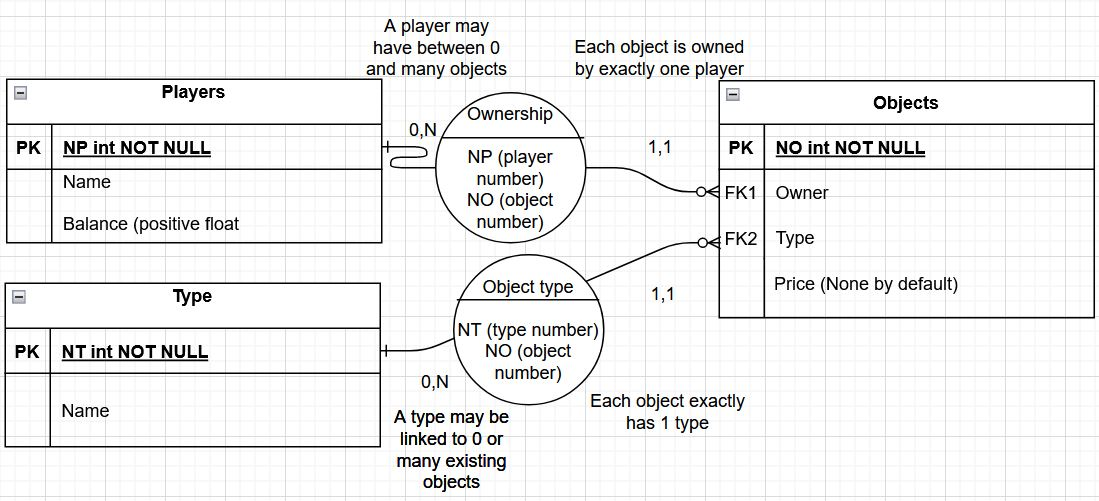

In [221]:
from IPython.display import Image
Image(filename='ER.jpg') 

__3.2__ Deduce the relational scheme while precising the _primary_ and _foreign_ (if any) keys for each relation.

We have the following tables :

Players(<ins>**NP**</ins>, Name, Balance)\
Objects(<ins>**NO**</ins>, <ins>NP</ins> (ref to Player table), <ins>NT</ins> (ref to Type table), Price)\
Players(<ins>**NT**</ins>,  Type Name)

By default, the price is None, which means that the object is not for sale yet.\
We make sure that the balance is a positive float, to only allow a transaction if the player has enough money.\
All primary keys (NP, NO, and NT) should be not Null, to keep a clean database.